In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!mkdir -p ~/ .kaggle

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 44.5MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.6MB/s]


In [10]:
!pip install keras==2.13.1

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [17]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train/",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test/",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [22]:

for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
         [ 64.45829   ,  48.13763   ,  27.234375  ],
         [ 70.37124   ,  54.533348  ,  31.435692  ],
         ...,
         [ 81.929474  ,  70.929474  ,  39.675564  ],
         [ 77.34375   ,  67.01332   ,  37.84479   ],
         [ 53.90165   ,  46.41532   ,  20.253212  ]],

        ...,

        [[ 59.028805  ,  52.452633  ,  48.028805  ],
         [ 95.0046    ,  92.12374   ,  84.42843   ],
         [192.11624   , 193.60843   , 180.48929   ],
         ...,
         [250.28125   , 226.53516   ,  83.78906   ],
         [252.76276   , 226.61041   ,  83.186584  ],
         [254.83789   , 227.67578   ,  83.67578   ]],

        [[ 73.54498   ,  66.96881   ,  62.544983  ],
         [ 56.889217  ,  54.008358  ,  46.313046  ],
         [151.65552   , 153.1477    , 140.02856   ],
         ...,
         [249.7461    , 226.        ,  83.25391   ],
         [253.00917   , 227.25858   ,  83.83474   ],
         [255.        , 229.        ,  85

In [23]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [24]:
model=Sequential()


In [25]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [28]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)


Epoch 1/2
625/625 [==============================] - 68s 87ms/step - loss: 0.6669 - accuracy: 0.6076 - val_loss: 0.6176 - val_accuracy: 0.6608
Epoch 2/2
625/625 [==============================] - 55s 88ms/step - loss: 0.5779 - accuracy: 0.6963 - val_loss: 0.5589 - val_accuracy: 0.7248


In [29]:
import matplotlib.pyplot as plt


In [37]:
dog_image=plt.imread("/content/dog_img.jpg")


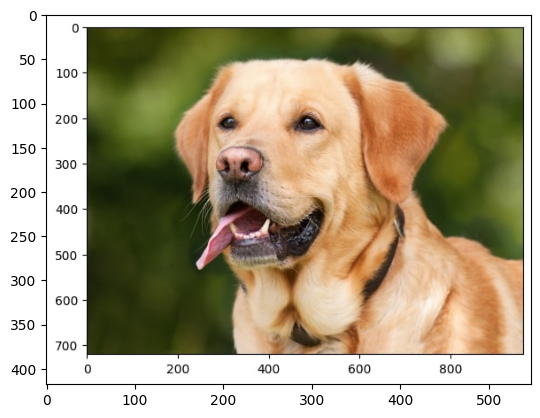

In [38]:
plt.imshow(dog_image)

In [39]:
cat_image=plt.imread("/content/cat_img.jpg")


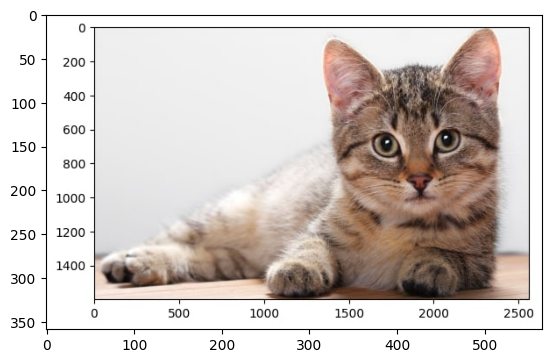

In [40]:
plt.imshow(cat_image)

In [41]:
dog_image.shape


(418, 548, 3)

In [42]:
cat_image.shape


(359, 566, 3)

In [43]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [44]:
dog_resize.shape


(256, 256, 3)

In [45]:
cat_resize.shape


(256, 256, 3)

In [46]:
dog_resize=dog_resize.reshape((1,256,256,3))


In [47]:
dog_resize.shape


(1, 256, 256, 3)

In [48]:
cat_resize=cat_resize.reshape((1,256,256,3))


In [49]:
pred=model.predict(dog_resize)


1/1 [==============================] - 0s 262ms/step


In [50]:
model.predict(cat_resize)


1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)

In [51]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog
